## Data loading - RLFW
Source: http://whdeng.cn/RFW/testing.html


Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [23]:
# Load packages

# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model


### Descriptive analysis of data

#### Data concatenation

In [24]:
## Create dataframe

# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
face_ids = []
id_class = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'RLFW_mini/data')
for ethnicity in ethnicities_list:
    ethnicity_dir = os.path.join(raw_data_path + 'RLFW_mini/data', ethnicity)
    if os.path.isdir(ethnicity_dir): # indside dir
        id_list = os.listdir(ethnicity_dir) # get ids
        for id_name in id_list:
            id = id_name.split('.')[1]
            print(id_name)

            ids_dir = os.path.join(ethnicity_dir, id_name)
            if os.path.isdir(ids_dir):
                for img_name in os.listdir(ids_dir):
                    if img_name.endswith('.jpg'):
                        # Extract information from image filename
                        image_name = os.path.splitext(img_name)[0]
                        image_info = image_name.split('_')
                        image_id = image_info[-1]

                        # Append image characteristics to lists
                        img_names.append(id_name)
                        ethnicities.append(ethnicity)
                        face_ids.append(image_id)
                        id_class.append(id)

                        

# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'id_class':id_class, 'face_id': face_ids}
df = pd.DataFrame(data)

# Display the DataFrame
print(len(df))
df.head()


m.0b_5sd
m.0b_1sx
m.0_4pw
m.0b__qdf
.DS_Store
m.0b_r3x
m.0b__05j
m.0b__9tq
m.0b_vd5
m.0b_c03
m.0b_dt6
m.0b0h05
m.0b_lsx
47


,img_name,ethnicity,id_class,face_id
0,m.0b_5sd,Indian,0b_5sd,0002
1,m.0b_5sd,Indian,0b_5sd,0003
2,m.0b_5sd,Indian,0b_5sd,0001
3,m.0b_1sx,Indian,0b_1sx,0001
4,m.0b_1sx,Indian,0b_1sx,0003


In [25]:
raw_data_path = '../data/raw/'
data_list = []

for ethnicity_age in os.listdir(raw_data_path + 'RLFW_mini'):
    if ethnicity_age.endswith('.json'):
        with open(raw_data_path + 'RLFW_mini/'+ethnicity_age, 'r') as file:
            json_data = json.load(file)
            data_list.append(json_data)

# Convert the JSON data to a DataFrame
age_df = pd.DataFrame.from_dict(json_data, orient='index', columns=['Age'])
# Convert the 'Age' column to numeric
age_df['Age'] = pd.to_numeric(age_df['Age'])
age_df.reset_index(inplace=True)
age_df.columns = ['img_name', 'Age']


In [26]:
age_df.img_name = age_df.img_name.apply(lambda x: x.split('_')[0])

In [27]:
# Concatenate dataframes
final_df = pd.merge(age_df, df, on='img_name', how='inner')
final_df.head()

,img_name,Age,ethnicity,id_class,face_id
0,m.0b0h05,45.0,Asian,0b0h05,0002
1,m.0b0h05,45.0,Asian,0b0h05,0003
2,m.0b0h05,45.0,Asian,0b0h05,0001
3,m.0b0h05,47.0,Asian,0b0h05,0002
4,m.0b0h05,47.0,Asian,0b0h05,0003


In [28]:
# Ensure 'Age' is of type integer
final_df['Age'] = final_df['Age'].astype(int)

# Define the age groups and corresponding labels
age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

# Update the DataFrame with age groupings
final_df['children_agegroup'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)


In [29]:
len(final_df)

9

#### Data distributions
(Evt efter age groups)

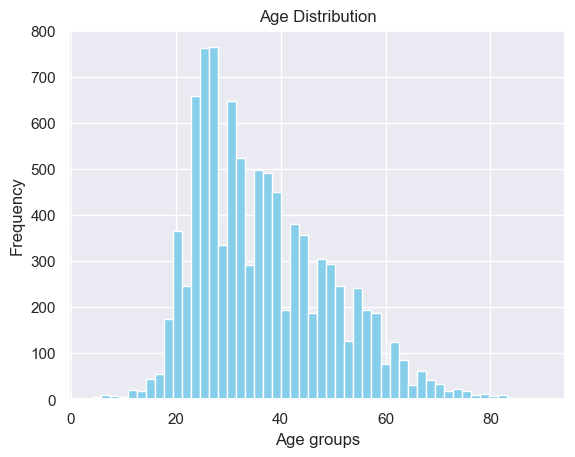

In [30]:
# Define bin edges for each group of 3 years
plt.hist(age_df['Age'], bins=50, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


#### Save df

In [34]:
final_df["im_id"] = final_df["id_class"]
final_df.to_csv('../data/raw/RLFW_mini/raw_rfw_df.csv', index=False)